# Aula 03 (2021-01-20)
- Importação da biblioteca pandas, criação do DataFrame e eliminação das duplicatas

In [1]:
import pandas as pd
df = pd.read_csv('datasets/kc_house_data.csv')
df.drop_duplicates(subset='id', keep='last', inplace=True)

## Questão 1: Criar a coluna Dormitory Types
- Imóveis sem quarto: NaDT (Not a Dormitory Type);
- Imóveis com 1 quarto: Studio;
- Imóveis com 2 quartos: Apartment;
- Imóveis com números de quarto acima de 2 e menores ou iguais a 4: House;
- Imóveis com mais de 4 quartos: Mansion.

In [2]:
df["dormitory_type"] = 'NaDT'
df.loc[df.bedrooms == 1, "dormitory_type"] = "studio"
df.loc[df.bedrooms == 2, "dormitory_type"] = "apartment"
df.loc[(df.bedrooms > 2) & (df.bedrooms <= 4), "dormitory_type"] = "house"
df.loc[df.bedrooms > 4, "dormitory_type"] = "mansion"

- Para conferir, será mostrada a contagem de valores para a coluna 'dormitory_types'

In [4]:
df['dormitory_type'].value_counts()

house        16580
apartment     2736
mansion       1913
studio         194
NaDT            13
Name: dormitory_type, dtype: int64

## Questão 2 a 5 
- 2) Gráfico de barras que represente a soma dos preços pelo número de quartos;

In [5]:
sumprice = df[["price", "bedrooms"]].groupby("bedrooms").sum().reset_index()

- 3) Gráfico de linhas que represente a média dos preços por ano de construção dos imóveis;

In [7]:
meanpby_year = df[["price", "yr_built"]].groupby("yr_built").mean().reset_index()

- 4) Gráfico de barras que represente a média dos preços pelo tipo de dormitório;

In [8]:
meanpby_type = df[["price", "dormitory_type"]].groupby("dormitory_type").mean().reset_index()

- 5) Gráfico de linhas que represente a média dos preços pelo ano de reforma.

In [9]:
meanpby_renovated = df[["price", "yr_renovated"]].groupby("yr_renovated").mean().reset_index()
meanpby_renovated.drop(meanpby_renovated[meanpby_renovated.yr_renovated == 0].index, axis=0, inplace=True)

## Gráficos das questões 2, 3, 4 e 5

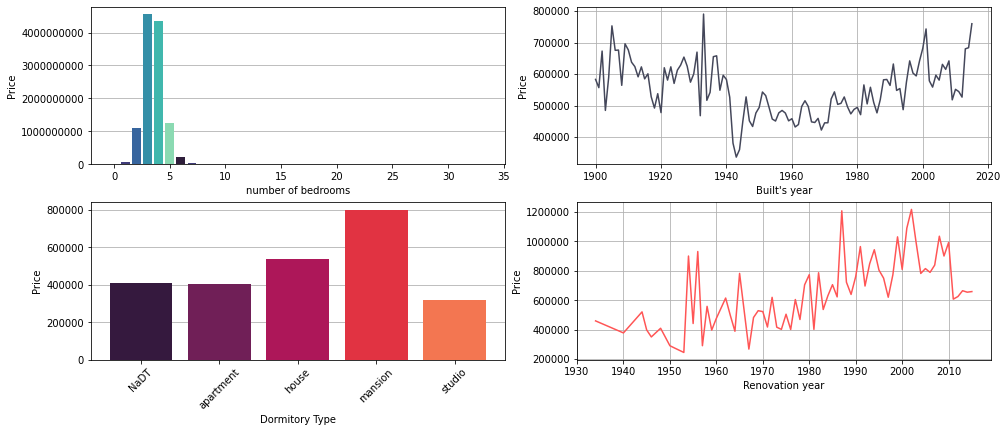

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 6))

plt.subplot(221)
plt.bar(sumprice["bedrooms"], sumprice["price"], color=sns.color_palette("mako"), zorder=2)
plt.grid(axis='y', zorder=0)
plt.ylabel("Price")
plt.xlabel("number of bedrooms")
plt.ticklabel_format(style='plain')

plt.subplot(222)
plt.plot(meanpby_year["yr_built"], meanpby_year["price"], color="#44475a")
plt.grid(True)
plt.ylabel("Price")
plt.xlabel("Built's year")

plt.subplot(223)
plt.bar(meanpby_type["dormitory_type"], meanpby_type["price"], color=sns.color_palette("rocket"), zorder=2)
plt.grid(axis='y', zorder=0)
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.xlabel("Dormitory Type")

plt.subplot(224)
plt.plot(meanpby_renovated["yr_renovated"], meanpby_renovated["price"], color="#ff5555")
plt.grid(True)
plt.ylabel("Price")
plt.xlabel("Renovation year")
plt.ticklabel_format(style='plain')

fig.tight_layout(pad=0.7)

plt.show()

## Questão 6: Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios

In [15]:
meanpby_built_type = df[["price", "yr_built", "dormitory_type"]].groupby(["yr_built", "dormitory_type"]).mean().reset_index()
print(meanpby_built_type)

     yr_built dormitory_type          price
0        1900      apartment  600928.571429
1        1900          house  567988.693548
2        1900        mansion  715562.500000
3        1900         studio  398944.000000
4        1901      apartment  452856.400000
..        ...            ...            ...
424      2014         studio  516500.000000
425      2015      apartment  543250.000000
426      2015          house  788559.000000
427      2015        mansion  820913.888889
428      2015         studio  385195.000000

[429 rows x 3 columns]


## Questão 7: Faça um Dashboard com 2 linhas e 2 colunas com os gráficos das questões 2, 3 e 4

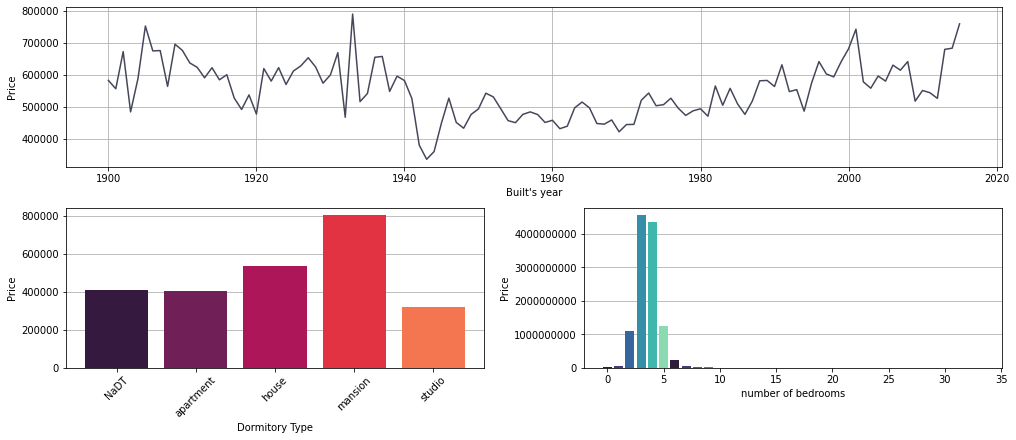

In [17]:
from matplotlib import gridspec

fig = plt.figure('Dashboard 2x2', figsize=(14, 6), constrained_layout=True)

specs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 1])
ax3 = fig.add_subplot(specs[1, 0])

ax2.bar(sumprice["bedrooms"], sumprice["price"], color=sns.color_palette("mako"), zorder=2)
ax2.grid(axis='y', zorder=0)
ax2.set_ylabel("Price")
ax2.set_xlabel("number of bedrooms")
ax2.ticklabel_format(style='plain')

ax1.plot(meanpby_year["yr_built"], meanpby_year["price"], color="#44475a")
ax1.grid(True)
ax1.set_ylabel("Price")
ax1.set_xlabel("Built's year")

ax3.bar(meanpby_type["dormitory_type"], meanpby_type["price"].round(0), color=sns.color_palette("rocket"), zorder=2)
ax3.grid(axis='y', zorder=0)
ax3.set_xticklabels(labels=meanpby_type["dormitory_type"], rotation=45)
ax3.set_ylabel("Price")
ax3.set_xlabel("Dormitory Type")

plt.show()

## Questão 8: Faça um Dashboard com 1 linha e 2 colunas com os gráficos das questões 2 e 4

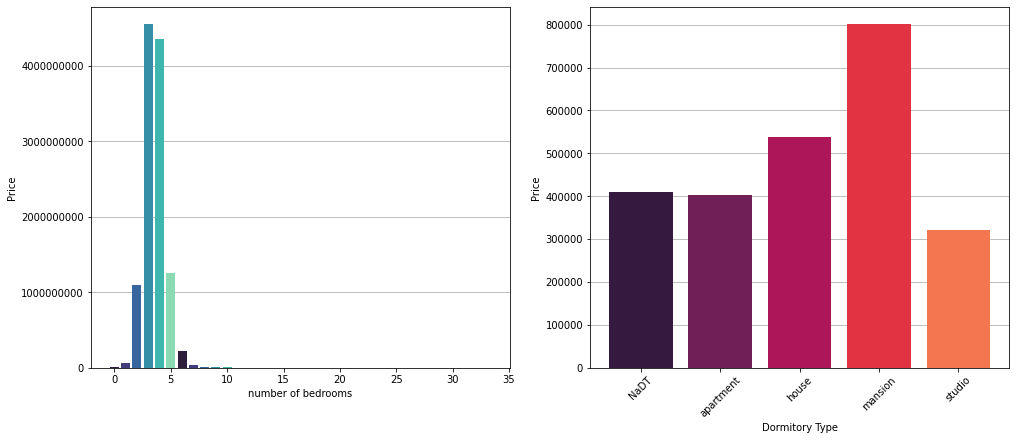

In [18]:
fig = plt.figure('Dashboard 1x2', figsize=(14, 6), constrained_layout=True)
specs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

ax1.bar(sumprice["bedrooms"], sumprice["price"], color=sns.color_palette("mako"), zorder=2)
ax1.grid(axis='y', zorder=0)
ax1.set_ylabel("Price")
ax1.set_xlabel("number of bedrooms")
ax1.ticklabel_format(style='plain')

ax2.bar(meanpby_type["dormitory_type"], meanpby_type["price"], color=sns.color_palette("rocket"), zorder=2)
ax2.grid(axis='y', zorder=0)
ax2.set_xticklabels(labels=meanpby_type["dormitory_type"], rotation=45)
ax2.set_ylabel("Price")
ax2.set_xlabel("Dormitory Type")

plt.show()

## Questão 9: Faça um Dashboard com 2 linhas e 1 coluna com os gráficos das questões 3 e 5

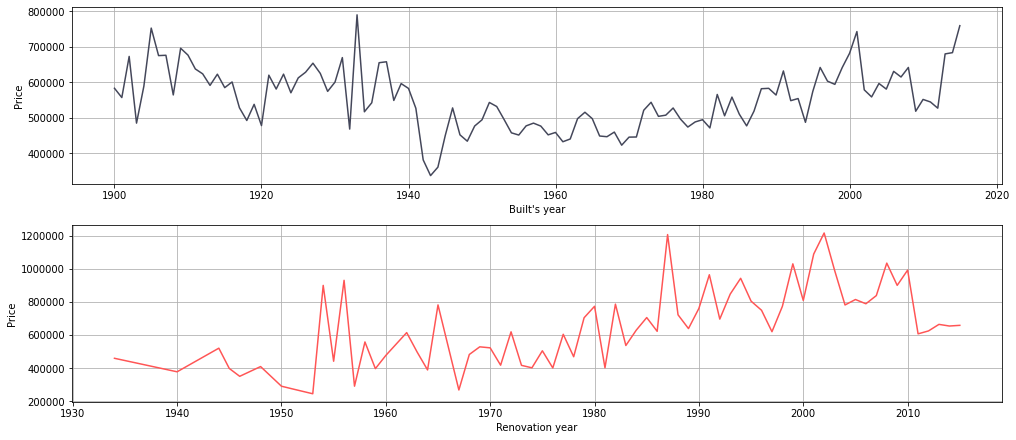

In [19]:
fig = plt.figure('Dashboard 2x1', figsize=(14, 6), constrained_layout=True)
specs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

ax1.plot(meanpby_year["yr_built"], meanpby_year["price"], color="#44475a")
ax1.grid(True)
ax1.set_ylabel("Price")
ax1.set_xlabel("Built's year")

ax2.plot(meanpby_renovated["yr_renovated"], meanpby_renovated["price"], color="#ff5555")
ax2.grid(True)
ax2.set_ylabel("Price")
ax2.set_xlabel("Renovation year")
ax2.ticklabel_format(style='plain')

plt.show()

## Questão 10: Faça um mapa com o tamanho dos pontos sendo proporcionais ao tamanho da sala de estar

In [20]:
import plotly.express as px

df_map = df[['id', 'lat', 'long', 'price', 'condition', 'date', 'sqft_living']]

mapa = px.scatter_mapbox(df_map, lat='lat', lon='long', hover_name='id', hover_data=['price'],
                        color='condition', color_continuous_scale=px.colors.sequential.Viridis, zoom=9, size='sqft_living', size_max=15)
mapa.update_layout(mapbox_style='open-street-map', margin={'l': 0, 't': 0, 'r': 0, 'b': 0})

mapa.show()

mapa.write_html('datasets/map.html')